# Caribbean Disaster: data unpacking and initial exploration

Install requirements.

In [1]:
! python3 -m pip install -r requirements.txt

In [4]:
! source myenv/bin/activate

/bin/sh: 1: source: not found


In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Image, display

Inspect *metadata.csv*.

In [21]:
metadata = pd.read_csv("data/metadata.csv")

In [22]:
metadata.head()

,image,train,test
0,stac/guatemala/mixco_1_and_ebenezer/mixco_1_an...,stac/guatemala/mixco_1_and_ebenezer/train-mixc...,stac/guatemala/mixco_1_and_ebenezer/test-mixco...
1,stac/guatemala/mixco_3/mixco_3_ortho-cog.tif,stac/guatemala/mixco_3/train-mixco_3.geojson,stac/guatemala/mixco_3/test-mixco_3.geojson
2,stac/st_lucia/castries/castries_ortho-cog.tif,stac/st_lucia/castries/train-castries.geojson,NaN
3,stac/st_lucia/dennery/dennery_ortho-cog.tif,stac/st_lucia/dennery/train-dennery.geojson,stac/st_lucia/dennery/test-dennery.geojson
4,stac/st_lucia/gros_islet/gros_islet_ortho-cog.tif,stac/st_lucia/gros_islet/train-gros_islet.geojson,NaN


In [23]:
metadata.image.loc[0]

'stac/guatemala/mixco_1_and_ebenezer/mixco_1_and_ebenezer_ortho-cog.tif'

In [24]:
metadata.train.loc[0]

'stac/guatemala/mixco_1_and_ebenezer/train-mixco_1_and_ebenezer.geojson'

In [25]:
metadata.test.loc[0]

'stac/guatemala/mixco_1_and_ebenezer/test-mixco_1_and_ebenezer.geojson'

Inspect *submission_format.csv*.

In [26]:
submission_format = pd.read_csv("data/submission_format.csv")

In [27]:
submission_format.head()

,id,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a4d630a,0.9,0.0,0.0,0.0,0.0
1,7a4bbbd6,0.9,0.0,0.0,0.0,0.0
2,7a4ac744,0.9,0.0,0.0,0.0,0.0
3,7a4881fa,0.9,0.0,0.0,0.0,0.0
4,7a4aa4a8,0.9,0.0,0.0,0.0,0.0


Inspect *train_labels.csv*.

In [28]:
train_labels = pd.read_csv("data/train_labels.csv")

In [29]:
train_labels.head()

,id,verified,concrete_cement,healthy_metal,incomplete,irregular_metal,other
0,7a3f2a10,True,1.0,0.0,0.0,0.0,0.0
1,7a1f731e,True,0.0,0.0,0.0,1.0,0.0
2,7a424ad8,True,0.0,1.0,0.0,0.0,0.0
3,7a3edc5e,True,0.0,1.0,0.0,0.0,0.0
4,7a303a6e,True,0.0,1.0,0.0,0.0,0.0


In [30]:
train_labels.tail()

,id,verified,concrete_cement,healthy_metal,incomplete,irregular_metal,other
22548,7a22ddec,False,0.0,1.0,0.0,0.0,0.0
22549,7a2f73ea,False,0.0,1.0,0.0,0.0,0.0
22550,7a34ffa4,False,0.0,1.0,0.0,0.0,0.0
22551,7a41560a,False,0.0,1.0,0.0,0.0,0.0
22552,7a283ad0,False,0.0,1.0,0.0,0.0,0.0


In [31]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22553 entries, 0 to 22552
Data columns (total 7 columns):
id                 22553 non-null object
verified           22553 non-null bool
concrete_cement    22553 non-null float64
healthy_metal      22553 non-null float64
incomplete         22553 non-null float64
irregular_metal    22553 non-null float64
other              22553 non-null float64
dtypes: bool(1), float64(5), object(1)
memory usage: 1.1+ MB


In [32]:
train_labels.describe()

,concrete_cement,healthy_metal,incomplete,irregular_metal,other
count,22553.000000,22553.000000,22553.000000,22553.000000,22553.000000
mean,0.067308,0.656986,0.029663,0.232386,0.013657
std,0.250560,0.474727,0.169661,0.422363,0.116064
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


concrete_cement
[1. 0.]


/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


healthy_metal
[0. 1.]


incomplete
[0. 1.]


irregular_metal
[0. 1.]


other
[0. 1.]


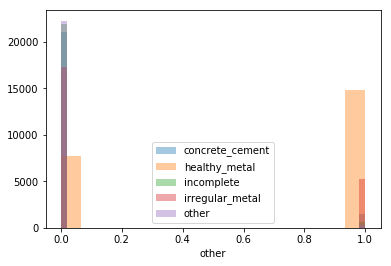

In [33]:
for column in train_labels.select_dtypes(include=np.number).columns:
    print(column)
    print(train_labels[column].unique())
    plot = sns.distplot(train_labels[column], label=column, kde=False)
plot.legend()

### Inspect the files in stac/colombia/borde_rural/

In [2]:
dir_path = "data/stac/colombia/borde_rural/"

In [11]:
with open(dir_path+'borde_rural-labels-train.json', 'r+') as f:
    br_labels_train = json.load(f)

In [14]:
with open(dir_path+'borde_rural-imagery.json', 'r+') as f:
    br_imagery = json.load(f)

In [35]:
with open(dir_path+'train-borde_rural.geojson', 'r+') as f:
    br_geojson_train = json.load(f)

Upon inspection, the GEOJSON consists of the following structure: {'features':[ {EXAMPLE_1}, {EXAMPLE_2}, ..., {EXAMPLE_N}]}, where each example contains the fields geometry, id, and properties. Inspecting three such examples yields:


In [39]:
br_geojson_train['features'][0:3]

[{'geometry': {'coordinates': [[[-74.15872901622859, 4.55513208404803],
     [-74.15869565550265, 4.555234421743102],
     [-74.15864296010655, 4.555217122695224],
     [-74.15867632083824, 4.555114785003784],
     [-74.15872901622859, 4.55513208404803]]],
   'type': 'Polygon'},
  'id': '7a3f2a10',
  'properties': {'id': '7a3f2a10',
   'roof_material': 'concrete_cement',
   'verified': True},
  'type': 'Feature'},
 {'geometry': {'coordinates': [[[-74.15879484827516, 4.555159047202581],
     [-74.15876112811927, 4.555251495820111],
     [-74.15870434247019, 4.555230637593402],
     [-74.15873806263139, 4.555138188979648],
     [-74.15879484827516, 4.555159047202581]]],
   'type': 'Polygon'},
  'id': '7a1f731e',
  'properties': {'id': '7a1f731e',
   'roof_material': 'irregular_metal',
   'verified': True},
  'type': 'Feature'},
 {'geometry': {'coordinates': [[[-74.158836091194, 4.555211747440405],
     [-74.15881647474212, 4.555266229801615],
     [-74.158767952284, 4.555248636112626],
 

In [5]:
def _extract_features(file_list):
    """Extracts examples to dataframe
    """
    # extract list of features
    features = []
    for file in file_list:
        with open(file, 'r+') as f:
            file_json = json.load(f)
            file_features = file_json['features']
            features.extend(file_features)
    # extract attributes of each feature
    coordinates = []
    ids = []
    materials = []
    verifieds = []
    for feature in features:
        geometry = feature.get('geometry')
        if geometry:
            coordinates.append(geometry.get('coordinates'))
        else:
            coordinates.append(None)
        ids.append(feature.get('id'))
        properties = feature.get('properties')
        if properties:
            materials.append(properties.get('roof_material'))
            verifieds.append(properties.get('verified'))
        else:
            materials.append(None)
            verifieds.append(None)
    feature_table = {
        "id": ids,
        "coordinates": coordinates,
        "roofing_material": materials,
        "verified": verifieds
    }
    feature_df = pd.DataFrame.from_dict(feature_table)
    return feature_df

In [6]:
br_features = _extract_features([dir_path+'train-borde_rural.geojson'])

In [7]:
br_features.head()

,coordinates,id,roofing_material,verified
0,"[[[-74.15872901622859, 4.55513208404803], [-74...",7a3f2a10,concrete_cement,True
1,"[[[-74.15879484827516, 4.555159047202581], [-7...",7a1f731e,irregular_metal,True
2,"[[[-74.158836091194, 4.555211747440405], [-74....",7a424ad8,healthy_metal,True
3,"[[[-74.15903983269945, 4.554721314179938], [-7...",7a3edc5e,healthy_metal,True
4,"[[[-74.1588363580349, 4.5549820955135605], [-7...",7a303a6e,healthy_metal,True


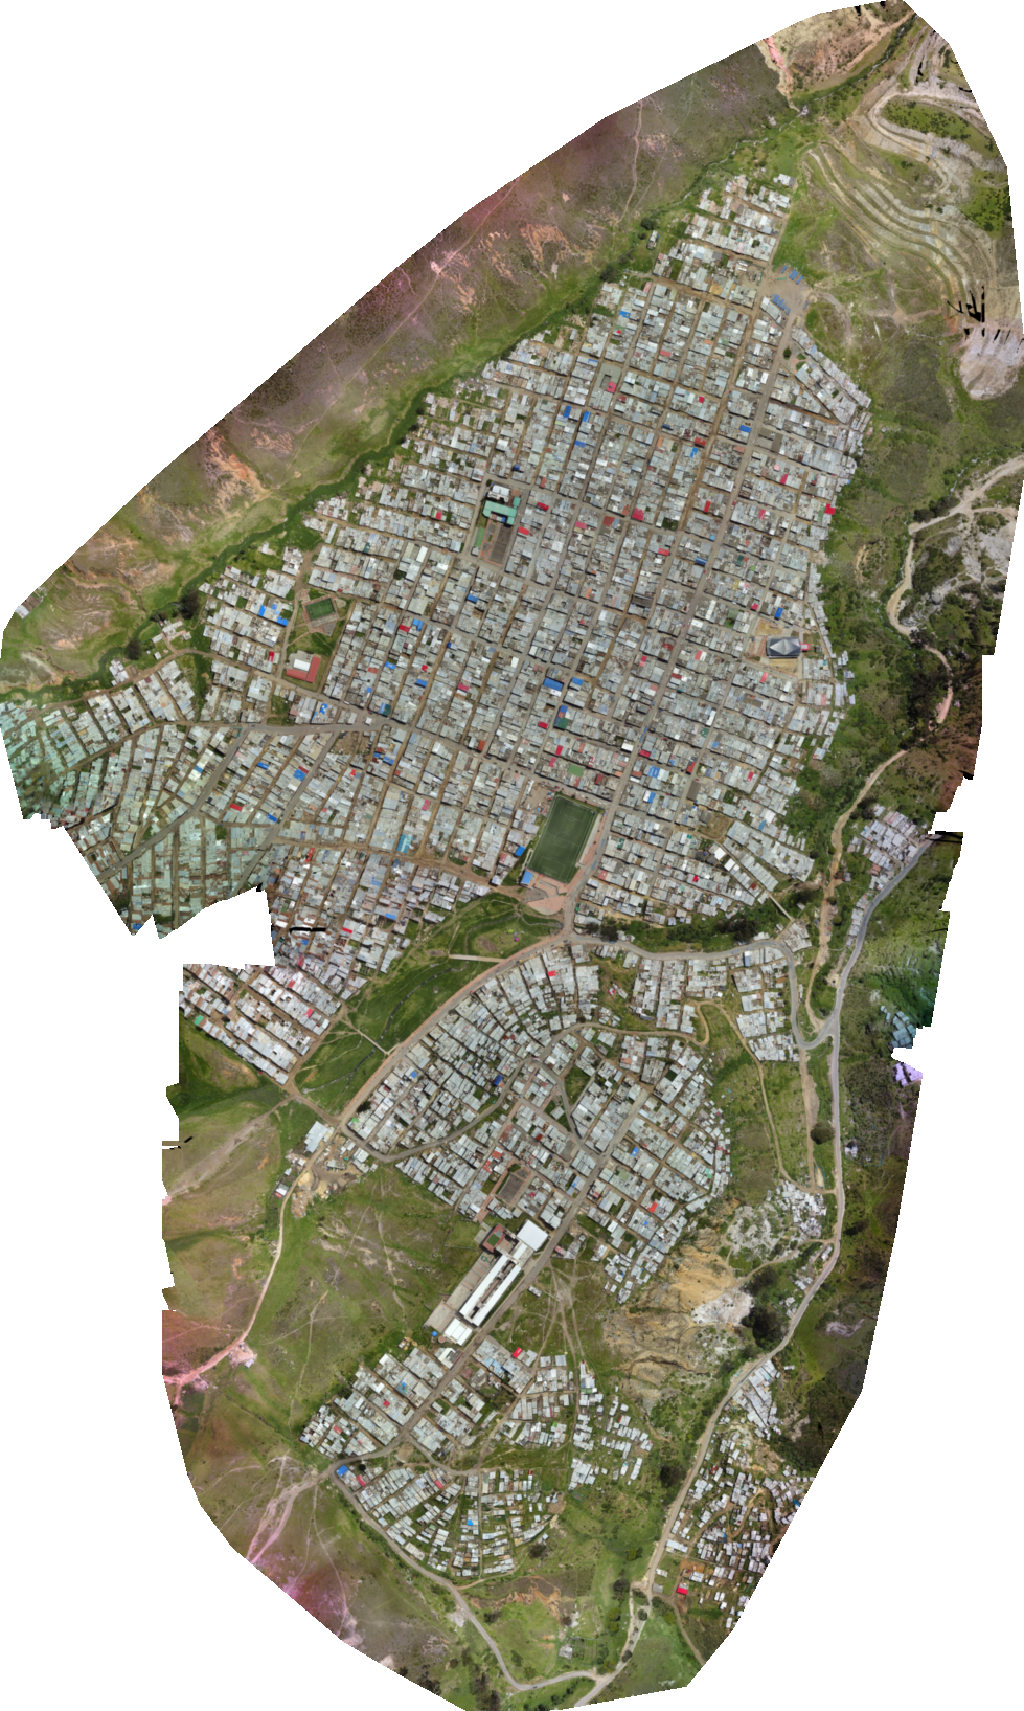

In [17]:
Image(filename=dic_path+'borde_rural_ortho-cog-thumbnail.png')